In [62]:
import pandas as pd

In [63]:
dataf = pd.read_csv("spi1_bqtls.new.tsv", sep="\t", header=0)


In [64]:
afrs = pd.read_csv("Afr.CaQTLS.new.tsv", sep="\t", header=0)

In [65]:
afrs = afrs[afrs["IsUsed"]]

In [66]:
afrs.head(2)

,chr_hg38,pos_hg38,allele1,allele2,snp_id,label,IsUsed,pval,beta,enformer.encsr000emt.variantscore.sad,...,chrombpnet.encsr095qnb.variantscore.jsd,chrombpnet.encsr095qnb.variantscore.csr,chrombpnet.encsr095qnb.variantscore.pval,dbsnp_rsid,region,snp,distance,se,abs_beta,id_hg19
2,chr1,870176,T,A,1_870176_T_A,False,True,0.071532,-0.250142,-0.000139,...,0.019025,0.001262,0.048612,rs72631880,1:869800:870282,1_870176_T_A,375,0.137133,0.250142,chr1_805556_T_A
4,chr1,905373,C,T,1_905373_T_C,False,True,0.188152,-0.130176,-0.000071,...,0.025277,0.003640,0.018781,rs4970382,1:904938:905544,1_905373_T_C,434,0.098145,0.130176,chr1_840753_T_C


In [67]:
dataf.head

<bound method NDFrame.head of           Chr   position  Depth  ALTdepth  REFDepth ALTallele  \
0       chr17   18967176    538       418       120         G   
1        chr4  176935913    626       597        29         A   
2        chr1  144534083    618       368       250         T   
3       chr17   19015381    144       143         1         A   
4        chr1   17231724   2477      1321      1156         G   
...       ...        ...    ...       ...       ...       ...   
999794   chr7   72298789    214         4       210         T   
999795  chr18   46347288    109         3       106         G   
999796  chr18   55508743     65         2        63         G   
999797  chr19   16245697    109         3       106         G   
999798   chr5   96271116    154         3       151         C   

        enformer_recomputed POSTallele  POSTfreq  prechipfreq  ...  \
0                  0.001704          A  0.223048     0.866699  ...   
1                 -0.990719          C  0.046326 

In [68]:
afrs.shape

(109646, 47)

In [69]:
bqtls = dataf[dataf["IsUsed"]]

In [70]:
dataf.shape

(999799, 29)

In [71]:
bqtls.shape

(881752, 29)

In [72]:
bqtls.head(2)

,Chr,position,Depth,ALTdepth,REFDepth,ALTallele,enformer_recomputed,POSTallele,POSTfreq,prechipfreq,...,ENCSR000EMT.logfc.mean,ENCSR000EMT.jsd_sign.mean,ENCSR000EMT.abs_logfc_x_jsd_x_max_percentile.mean,ENCSR000EMT.abs_logfc_x_jsd_x_max_percentile.mean.pval,rsid,DNASE_SAD,DNASE_SAR,pos0,IsUsed,InPeaks
0,chr17,18967176,538,418,120,G,0.001704,A,0.223048,0.866699,...,0.360720,0.052333,0.017846,0.001838,rs78457033,-0.000056,-0.000062,18967175,True,False
5,chr16,87705494,115,105,10,G,-0.279317,C,0.086957,0.934802,...,1.219415,0.162647,0.111883,0.000023,rs112728011,0.004025,0.005314,87705493,True,False


In [73]:
sum((bqtls["pvalue"]<1e-4))

3818

In [74]:
bqtls.columns

Index(['Chr', 'position', 'Depth', 'ALTdepth', 'REFDepth', 'ALTallele',
       'enformer_recomputed', 'POSTallele', 'POSTfreq', 'prechipfreq',
       'pvalue', 'ENCSR637XSC.logfc.mean', 'ENCSR637XSC.jsd_sign.mean',
       'ENCSR637XSC.abs_logfc_x_jsd_x_max_percentile.mean',
       'ENCSR637XSC.abs_logfc_x_jsd_x_max_percentile.mean.pval',
       'ENCSR637XSC.sub.50M.logfc.mean', 'ENCSR637XSC.sub.50M.jsd_sign.mean',
       'ENCSR637XSC.sub.50M.abs_logfc_x_jsd_x_max_percentile.mean',
       'ENCSR637XSC.sub.50M.abs_logfc_x_jsd_x_max_percentile.mean.pval',
       'ENCSR000EMT.logfc.mean', 'ENCSR000EMT.jsd_sign.mean',
       'ENCSR000EMT.abs_logfc_x_jsd_x_max_percentile.mean',
       'ENCSR000EMT.abs_logfc_x_jsd_x_max_percentile.mean.pval', 'rsid',
       'DNASE_SAD', 'DNASE_SAR', 'pos0', 'IsUsed', 'InPeaks'],
      dtype='object')

<AxesSubplot:>

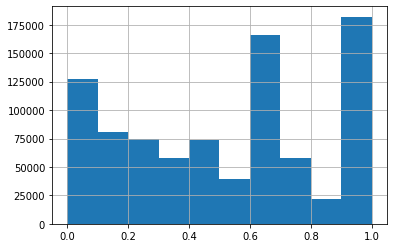

In [75]:
bqtls["pvalue"].hist()

In [76]:
import numpy as np
np.min(bqtls["pvalue"])

0.0

In [77]:
np.max(bqtls["pvalue"])

1.0

# AUPRC (benchmarking)

In [78]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib


matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

import random
import os
import argparse
from sklearn.metrics import precision_recall_curve

random_bc = []
chrombpnet = {}
enformer_dnase_roc = []
enformer_dnase_roc_sar = []

chrombpnet["ChromBPNet DNase (68M)"] = []
chrombpnet["ChromBPNet ATAC (572M)"] = []
chrombpnet["ChromBPNet ATAC (50M)"] = []

for threshold in np.arange(4,10,1):
    threshold = 1 / (10**(threshold))
    print(threshold)
    dataf1 = bqtls[bqtls["pvalue"]<threshold]
    dataf1["label"] = 1
    dataf1 = dataf1[["ENCSR000EMT.abs_logfc_x_jsd_x_max_percentile.mean", 
                    "ENCSR637XSC.abs_logfc_x_jsd_x_max_percentile.mean",
                     "ENCSR637XSC.sub.50M.abs_logfc_x_jsd_x_max_percentile.mean",
                    "DNASE_SAR", "enformer_recomputed", "label"]]
    
    dataf2 = afrs[afrs["label"]==0]
    dataf2["ENCSR637XSC.abs_logfc_x_jsd_x_max_percentile.mean"] = dataf2["chrombpnet.encsr637xsc.variantscore.csr"]
    dataf2["ENCSR637XSC.sub.50M.abs_logfc_x_jsd_x_max_percentile.mean"] = dataf2["chrombpnet.encsr637xsc_50m.variantscore.csr"]
    dataf2["ENCSR000EMT.abs_logfc_x_jsd_x_max_percentile.mean"] = dataf2["chrombpnet.encsr000emt.variantscore.csr"]
    dataf2["DNASE_SAR"] = dataf2["enformer.encsr000emt.variantscore.sar"]
    dataf2["enformer_recomputed"] = dataf2["enformer_recomputed"]

    dataf2 = dataf2[["ENCSR000EMT.abs_logfc_x_jsd_x_max_percentile.mean", 
                    "ENCSR637XSC.abs_logfc_x_jsd_x_max_percentile.mean",
                    "ENCSR637XSC.sub.50M.abs_logfc_x_jsd_x_max_percentile.mean",
                    "DNASE_SAR",  "enformer_recomputed", "label"]]
    
    dataf = pd.concat([dataf1, dataf2])
    
    total = dataf.shape[0]
    sigs = sum(dataf["label"])
    print(sigs)
    print(total)
    print(np.round(sigs/total,3))
    
    random_bc.append(np.round(sigs/total,5))
    
    roc_auc = metrics.average_precision_score(dataf["label"], abs(dataf["ENCSR000EMT.abs_logfc_x_jsd_x_max_percentile.mean"]))
    chrombpnet["ChromBPNet DNase (68M)"].append(roc_auc)

    roc_auc = metrics.average_precision_score(dataf["label"], abs(dataf["ENCSR637XSC.abs_logfc_x_jsd_x_max_percentile.mean"]))
    chrombpnet["ChromBPNet ATAC (572M)"].append(roc_auc)

    roc_auc = metrics.average_precision_score(dataf["label"], abs(dataf["ENCSR637XSC.sub.50M.abs_logfc_x_jsd_x_max_percentile.mean"]))
    chrombpnet["ChromBPNet ATAC (50M)"].append(roc_auc)
    
    roc_auc = metrics.average_precision_score(dataf["label"], abs(dataf["DNASE_SAR"]))
    enformer_dnase_roc_sar.append(roc_auc)

    roc_auc = metrics.average_precision_score(dataf["label"], abs(dataf["enformer_recomputed"]))
    enformer_dnase_roc.append(roc_auc)


0.0001
3818
105101
0.036
1e-05


/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

1836
103119
0.018
1e-06
1082
102365
0.011
1e-07
756
102039
0.007
1e-08
588
101871
0.006
1e-09
447
101730
0.004


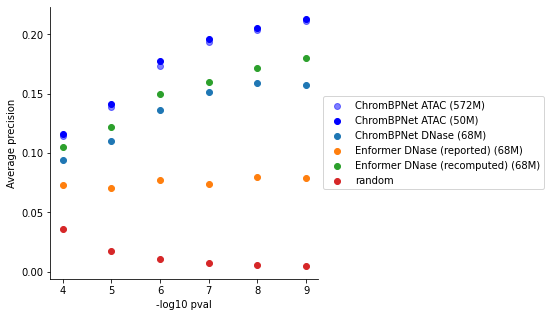

In [79]:


fig, ax = plt.subplots(figsize=(6,5))
colors = ["blue", "blue"]
alphas = [0.5, 1.0]
idx=0
for key in ["ChromBPNet ATAC (572M)", "ChromBPNet ATAC (50M)"]:
    ax.scatter(np.arange(4,10,1).astype(str), chrombpnet[key], label=key, c="blue", alpha=alphas[idx])
    idx+=1
    
key="ChromBPNet DNase (68M)"
ax.scatter(np.arange(4,10,1).astype(str), chrombpnet[key], label=key)
ax.scatter(np.arange(4,10,1).astype(str), enformer_dnase_roc_sar, label="Enformer DNase (reported) (68M)")
ax.scatter(np.arange(4,10,1).astype(str), enformer_dnase_roc, label="Enformer DNase (recomputed) (68M)")

ax.scatter(np.arange(4,10,1).astype(str), random_bc, label="random")

ax.spines[["top", "right"]].set_visible(False)
ax.set_xlabel("-log10 pval")
ax.set_ylabel("Average precision")
#plt.legend(loc='upper right')

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


plt.savefig("subfigs/bqtls_auprc_compare.pdf", transparent=True, dpi=300)


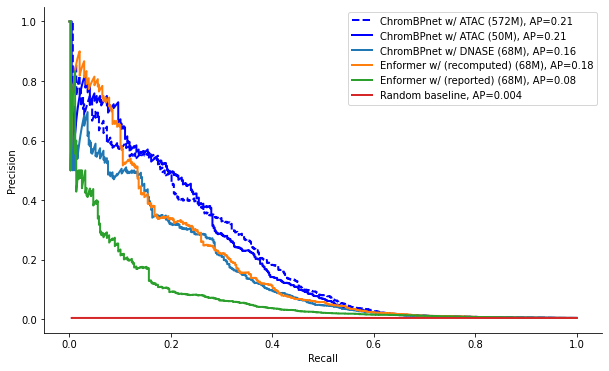

In [80]:

fig, ax = plt.subplots(figsize=(10,6))

######################################

keyd="ENCSR637XSC.abs_logfc_x_jsd_x_max_percentile.mean"

label=dataf["label"].astype(int)
score=abs(dataf[keyd])

title="ChromBPnet w/ ATAC (572M)"

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, c='blue', linestyle='dashed', label=title+", AP="+str(round(roc_auc,2)))

######################################

keyd="ENCSR637XSC.sub.50M.abs_logfc_x_jsd_x_max_percentile.mean"
label=dataf["label"].astype(int)
score=abs(dataf[keyd])

title="ChromBPnet w/ ATAC (50M)"

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, c='blue', label=title+", AP="+str(round(roc_auc,2)))

######################################

keyd="ENCSR000EMT.abs_logfc_x_jsd_x_max_percentile.mean"
label=dataf["label"].astype(int)
score=abs(dataf[keyd])

title="ChromBPnet w/ DNASE (68M)"

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label=title+", AP="+str(round(roc_auc,2)))

######################################

keyd="enformer_recomputed"
label=dataf["label"].astype(int)
score=abs(dataf[keyd])
title="Enformer w/ (recomputed) (68M)"

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label=title+", AP="+str(round(roc_auc,2)))

######################################

keyd="DNASE_SAR"
label=dataf["label"].astype(int)
score=abs(dataf[keyd])
title="Enformer w/ (reported) (68M)"


fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label=title+", AP="+str(round(roc_auc,2)))
enformer_auc = roc_auc

######################################

roc_auc=sum(dataf["label"]==1)/len(dataf["label"])
ax.plot(fpr_chrombpnet, [sum(dataf["label"]==1)/len(dataf["label"])]*len(fpr_chrombpnet), linewidth=2, label="Random baseline, AP="+str(round(roc_auc,3)))


ax.spines[["top", "right"]].set_visible(False)
ax.legend(loc='upper right')
ax.set_xlabel("Recall")
ax.set_ylabel("Precision")

plt.savefig("subfigs/bqtls_auprc.pdf", transparent=True, dpi=300)


# Pearsonrs (benchmarking)

In [81]:
bqtls.columns

Index(['Chr', 'position', 'Depth', 'ALTdepth', 'REFDepth', 'ALTallele',
       'enformer_recomputed', 'POSTallele', 'POSTfreq', 'prechipfreq',
       'pvalue', 'ENCSR637XSC.logfc.mean', 'ENCSR637XSC.jsd_sign.mean',
       'ENCSR637XSC.abs_logfc_x_jsd_x_max_percentile.mean',
       'ENCSR637XSC.abs_logfc_x_jsd_x_max_percentile.mean.pval',
       'ENCSR637XSC.sub.50M.logfc.mean', 'ENCSR637XSC.sub.50M.jsd_sign.mean',
       'ENCSR637XSC.sub.50M.abs_logfc_x_jsd_x_max_percentile.mean',
       'ENCSR637XSC.sub.50M.abs_logfc_x_jsd_x_max_percentile.mean.pval',
       'ENCSR000EMT.logfc.mean', 'ENCSR000EMT.jsd_sign.mean',
       'ENCSR000EMT.abs_logfc_x_jsd_x_max_percentile.mean',
       'ENCSR000EMT.abs_logfc_x_jsd_x_max_percentile.mean.pval', 'rsid',
       'DNASE_SAD', 'DNASE_SAR', 'pos0', 'IsUsed', 'InPeaks'],
      dtype='object')

/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


(0.5907530863032388, 2.126609788708331e-43)


Text(0.5, 1.0, 'Pearsonr = 0.59')

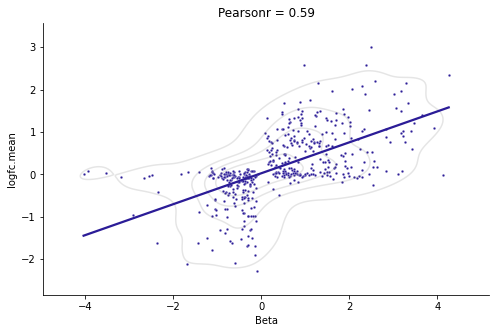

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

bqtls['logratio']=np.log2((bqtls['prechipfreq'].astype(float)+.01)/(bqtls['POSTfreq'].astype(float)+0.01))

plt.figure(figsize=(8,5))
data = pd.DataFrame()
data["logfc.mean"] = bqtls[bqtls["pvalue"] < 1e-9]["ENCSR637XSC.logfc.mean"]
data["Beta"] = bqtls[bqtls["pvalue"] < 1e-9]["logratio"]

sns.kdeplot(
    data=data,
    x="Beta",
    y="logfc.mean",
    levels=5,
    fill=False,
    alpha=0.2,
    color="grey",
    cut=2,

)


ax = sns.scatterplot(x="Beta", y="logfc.mean", data=data, s=6, color="#2B1C97")
sns.regplot(x="Beta", y="logfc.mean", data=data, scatter=False, ci=None, color="#2B1C97")
ax.spines[["top", "right"]].set_visible(False)

atc_pear = scipy.stats.pearsonr(data["logfc.mean"],data["Beta"])
print(atc_pear)
ax.set_title("Pearsonr = "+str(np.round(atc_pear[0],2)))

#plt.savefig("subfigs/bqtls_scatter_plot.pdf", transparent=True, dpi=300)


In [86]:
import scipy.stats
chrombpnet = {}
chrombpnet_unsigned = {}
enformer = []
enformer_unsigned = []
enformer_sar = []
enformer_unsigned_sar = []

chrombpnet["ChromBPNet DNase (68M)"] = []
chrombpnet["ChromBPNet ATAC (572M)"] = []
chrombpnet["ChromBPNet ATAC (50M)"] = []

chrombpnet_unsigned["ChromBPNet DNase (68M)"] = []
chrombpnet_unsigned["ChromBPNet ATAC (572M)"] = []
chrombpnet_unsigned["ChromBPNet ATAC (50M)"] = []

for threshold in np.arange(4,10,1):
    threshold = 1 / (10**(threshold))

    print(threshold)
    dataf = bqtls[(bqtls["pvalue"]<threshold)]
        
    pear = scipy.stats.pearsonr(dataf["ENCSR000EMT.logfc.mean"], dataf["logratio"])
    chrombpnet["ChromBPNet DNase (68M)"].append(pear[0])
    
    pear = scipy.stats.pearsonr(abs(dataf["ENCSR000EMT.logfc.mean"]), abs(dataf["logratio"]))
    chrombpnet_unsigned["ChromBPNet DNase (68M)"].append(pear[0])    
 
    pear = scipy.stats.pearsonr(dataf["ENCSR637XSC.logfc.mean"], dataf["logratio"])
    chrombpnet["ChromBPNet ATAC (572M)"].append(pear[0])
    print(pear)
    
    pear = scipy.stats.pearsonr(abs(dataf["ENCSR637XSC.logfc.mean"]), abs(dataf["logratio"]))
    chrombpnet_unsigned["ChromBPNet ATAC (572M)"].append(pear[0])    

    pear = scipy.stats.pearsonr(dataf["ENCSR637XSC.sub.50M.logfc.mean"], dataf["logratio"])
    chrombpnet["ChromBPNet ATAC (50M)"].append(pear[0])
    print(pear)
    
    pear = scipy.stats.pearsonr(abs(dataf["ENCSR637XSC.sub.50M.logfc.mean"]), abs(dataf["logratio"]))
    chrombpnet_unsigned["ChromBPNet ATAC (50M)"].append(pear[0])
    print(pear)
    
    pear = scipy.stats.pearsonr(dataf["enformer_recomputed"]*-1, dataf["logratio"])
    enformer.append(pear[0])
    print(pear)
    
    pear = scipy.stats.pearsonr(abs(dataf["enformer_recomputed"]), abs(dataf["logratio"]))
    enformer_unsigned.append(pear[0])
    print(pear)

    pear = scipy.stats.pearsonr(dataf["DNASE_SAR"], dataf["logratio"])
    enformer_sar.append(pear[0])
    
    pear = scipy.stats.pearsonr(abs(dataf["DNASE_SAR"]), abs(dataf["logratio"]))
    enformer_unsigned_sar.append(pear[0])


0.0001
(0.3456664008762522, 1.3461902564870874e-107)
(0.33825479358945226, 7.853922186470018e-103)
(0.09772657619245632, 1.4392000215477486e-09)
(0.29801135390237576, 3.705821829839822e-79)
(0.024670217302556304, 0.1274825574137993)
1e-05
(0.42329102700730575, 1.0235294326081794e-80)
(0.41689084290850426, 4.14130766524779e-78)
(0.125233422009284, 7.300037058382848e-08)
(0.3635434514270092, 1.8009184762082764e-58)
(0.04125415827793011, 0.07718968886737394)
1e-06
(0.50030692793228, 1.3235987654956608e-69)
(0.49575079374180037, 3.4757799582249244e-68)
(0.16968379172014564, 1.955875671048076e-08)
(0.43704013394810604, 1.0812892467843035e-51)
(0.06978802933595976, 0.021690905805218718)
1e-07
(0.5282917609125022, 1.4435264058065224e-55)
(0.5220637570429951, 4.400745286278192e-54)
(0.18866877284583086, 1.7326049125652955e-07)
(0.4783954363265271, 1.698913189034947e-44)
(0.09901833831729295, 0.006435060045045102)
1e-08
(0.5664134092166404, 3.4191444652453627e-51)
(0.5587969011930763, 1.3657457

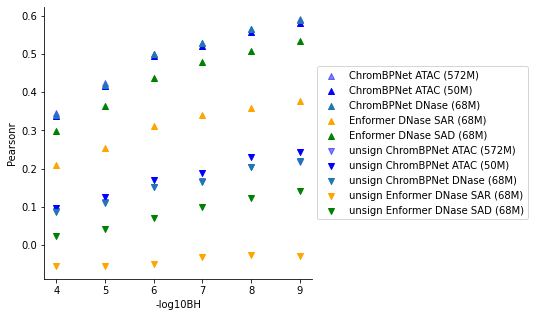

In [85]:
fig, ax = plt.subplots(figsize=(6,5))

colors = ["blue", "blue", "C0"]
alphas= [0.5, 1.0, 1.0, 1.0] 

i=0
for key in ["ChromBPNet ATAC (572M)", "ChromBPNet ATAC (50M)", "ChromBPNet DNase (68M)"]:
    ax.scatter(np.arange(4,10,1).astype(str), chrombpnet[key], marker="^", label=key, color=colors[i], alpha=alphas[i])
    i+=1


ax.scatter(np.arange(4,10,1).astype(str), enformer_sar ,  marker="^", label="Enformer DNase SAR (68M)", color="orange")
ax.scatter(np.arange(4,10,1).astype(str), enformer ,  marker="^", label="Enformer DNase SAD (68M)", color="green")

i=0
for key in ["ChromBPNet ATAC (572M)", "ChromBPNet ATAC (50M)", "ChromBPNet DNase (68M)"]:
    ax.scatter(np.arange(4,10,1).astype(str), chrombpnet_unsigned[key], marker="v", label="unsign "+key, color=colors[i], alpha=alphas[i])
    i+=1
    
ax.scatter(np.arange(4,10,1).astype(str), enformer_unsigned_sar, marker="v", label="unsign " +"Enformer DNase SAR (68M)", color="orange")
ax.scatter(np.arange(4,10,1).astype(str), enformer_unsigned, marker="v", label="unsign " +"Enformer DNase SAD (68M)", color="green")


ax.spines[["top", "right"]].set_visible(False)
ax.set_xlabel("-log10BH")
ax.set_ylabel("Pearsonr")
#plt.legend(loc='upper right')

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#plt.show()

#plt.savefig("subfigs/bqtls_pearsonr_compare.pdf", transparent=True, dpi=300)



In [30]:
import scipy.stats
chrombpnet = {}
chrombpnet_unsigned = {}
enformer = []
enformer_unsigned = []
enformer_sar = []
enformer_unsigned_sar = []

chrombpnet["ChromBPNet DNase (68M)"] = []
chrombpnet["ChromBPNet ATAC (572M)"] = []
chrombpnet["ChromBPNet ATAC (50M)"] = []

chrombpnet_unsigned["ChromBPNet DNase (68M)"] = []
chrombpnet_unsigned["ChromBPNet ATAC (572M)"] = []
chrombpnet_unsigned["ChromBPNet ATAC (50M)"] = []

for threshold in np.arange(4,10,1):
    threshold = 1 / (10**(threshold))

    print(threshold)
    dataf = bqtls[(bqtls["pvalue"]<threshold)]
        
    pear = scipy.stats.pearsonr(dataf["ENCSR000EMT.jsd_sign.mean"], dataf["logratio"])
    chrombpnet["ChromBPNet DNase (68M)"].append(pear[0])
    
    pear = scipy.stats.pearsonr(abs(dataf["ENCSR000EMT.jsd_sign.mean"]), abs(dataf["logratio"]))
    chrombpnet_unsigned["ChromBPNet DNase (68M)"].append(pear[0])    
 
    pear = scipy.stats.pearsonr(dataf["ENCSR637XSC.jsd_sign.mean"], dataf["logratio"])
    chrombpnet["ChromBPNet ATAC (572M)"].append(pear[0])
    
    pear = scipy.stats.pearsonr(abs(dataf["ENCSR637XSC.jsd_sign.mean"]), abs(dataf["logratio"]))
    chrombpnet_unsigned["ChromBPNet ATAC (572M)"].append(pear[0])    

    pear = scipy.stats.pearsonr(dataf["ENCSR637XSC.sub.50M.jsd_sign.mean"], dataf["logratio"])
    chrombpnet["ChromBPNet ATAC (50M)"].append(pear[0])
    
    pear = scipy.stats.pearsonr(abs(dataf["ENCSR637XSC.sub.50M.jsd_sign.mean"]), abs(dataf["logratio"]))
    chrombpnet_unsigned["ChromBPNet ATAC (50M)"].append(pear[0])
    
    pear = scipy.stats.pearsonr(dataf["enformer_recomputed"]*-1, dataf["logratio"])
    enformer.append(pear[0])
    
    pear = scipy.stats.pearsonr(abs(dataf["enformer_recomputed"]), abs(dataf["logratio"]))
    enformer_unsigned.append(pear[0])

    pear = scipy.stats.pearsonr(dataf["DNASE_SAR"], dataf["logratio"])
    enformer_sar.append(pear[0])
    
    pear = scipy.stats.pearsonr(abs(dataf["DNASE_SAR"]), abs(dataf["logratio"]))
    enformer_unsigned_sar.append(pear[0])


0.0001
1e-05
1e-06
1e-07
1e-08
1e-09


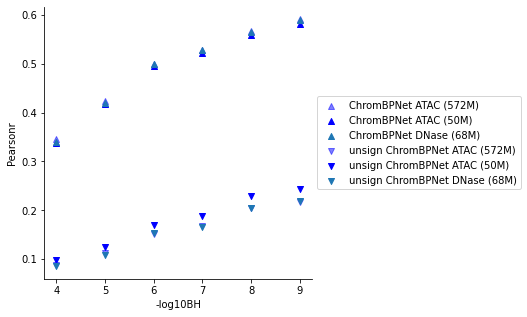

In [58]:
fig, ax = plt.subplots(figsize=(6,5))

colors = ["blue", "blue", "C0"]
alphas= [0.5, 1.0, 1.0, 1.0] 

i=0
for key in ["ChromBPNet ATAC (572M)", "ChromBPNet ATAC (50M)", "ChromBPNet DNase (68M)"]:
    ax.scatter(np.arange(4,10,1).astype(str), chrombpnet[key], marker="^", label=key, color=colors[i], alpha=alphas[i])
    i+=1


# ax.scatter(np.arange(4,10,1).astype(str), enformer_sar ,  marker="^", label="Enformer DNase SAR (68M)", color="orange")
# ax.scatter(np.arange(4,10,1).astype(str), enformer ,  marker="^", label="Enformer DNase SAD (68M)", color="green")

i=0
for key in ["ChromBPNet ATAC (572M)", "ChromBPNet ATAC (50M)", "ChromBPNet DNase (68M)"]:
    ax.scatter(np.arange(4,10,1).astype(str), chrombpnet_unsigned[key], marker="v", label="unsign "+key, color=colors[i], alpha=alphas[i])
    i+=1
    
# ax.scatter(np.arange(4,10,1).astype(str), enformer_unsigned_sar, marker="v", label="unsign " +"Enformer DNase SAR (68M)", color="orange")
# ax.scatter(np.arange(4,10,1).astype(str), enformer_unsigned, marker="v", label="unsign " +"Enformer DNase SAD (68M)", color="green")


ax.spines[["top", "right"]].set_visible(False)
ax.set_xlabel("-log10BH")
ax.set_ylabel("Pearsonr")
#plt.legend(loc='upper right')

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#plt.show()

plt.savefig("subfigs/bqtls_pearsonr_compare_jsd.pdf", transparent=True, dpi=300)



/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


['n: 145', 'n: 302', 'n: 309', 'n: 1080', 'n: 8011', 'n: 117808', 'n: 182109', 'n: 284896', 'n: 287092']


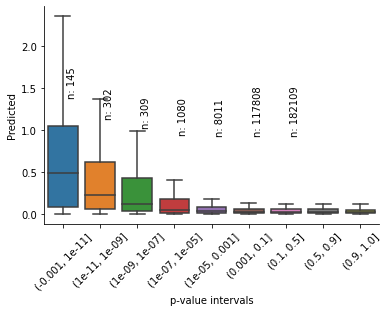

In [26]:
bins = np.array(np.arange(0,5e-9,5e-8).tolist() + [1e-2,0.1,1.0])
bins = [-0.001,1e-11,1e-9, 1e-7, 1e-5,1e-3,1e-1,0.5,0.9,1.0 ]
bqtls['value_group'] = pd.cut(bqtls["pvalue"].astype(np.float64), bins=bins)
bqtls['abs_logfc'] = abs(bqtls['ENCSR637XSC.logfc.mean'])
ax = sns.boxplot(x="value_group", y="abs_logfc", data=bqtls, showfliers=False)
plt.xticks(rotation=45)
medians = bqtls.groupby(['value_group'])['abs_logfc'].median().values
nobs= bqtls['value_group'].value_counts().values[::-1]
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs] 
print(nobs)
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_yticklabels()):
    ax.text(tick+0.1,medians[tick]+0.9,nobs[tick],color='black', verticalalignment = "bottom",rotation=90)
sns.despine()
ax.set(xlabel='p-value intervals', ylabel='Predicted')

plt.savefig("subfigs/bqtls_predicted_bins_atac.pdf", transparent=True, dpi=300)


/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


['n: 145', 'n: 302', 'n: 309', 'n: 1080', 'n: 8011', 'n: 117808', 'n: 182109', 'n: 284896', 'n: 287092']


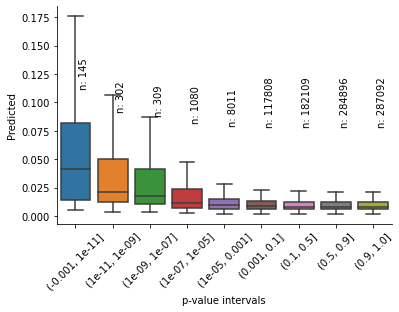

In [27]:
bins = np.array(np.arange(0,5e-9,5e-8).tolist() + [1e-2,0.1,1.0])
bins = [-0.001,1e-11,1e-9, 1e-7, 1e-5,1e-3,1e-1,0.5,0.9,1.0 ]
bqtls['value_group'] = pd.cut(bqtls["pvalue"].astype(np.float64), bins=bins)
bqtls['abs_logfc'] = abs(bqtls['ENCSR637XSC.jsd_sign.mean'])
ax = sns.boxplot(x="value_group", y="abs_logfc", data=bqtls, showfliers=False)
plt.xticks(rotation=45)
medians = bqtls.groupby(['value_group'])['abs_logfc'].median().values
nobs= bqtls['value_group'].value_counts().values[::-1]
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs] 
print(nobs)
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_yticklabels()):
    ax.text(tick+0.1,medians[tick]+0.07,nobs[tick],color='black', verticalalignment = "bottom",rotation=90)
sns.despine()
ax.set(xlabel='p-value intervals', ylabel='Predicted')

plt.savefig("subfigs/bqtls_predicted_bins_atac_jsd.pdf", transparent=True, dpi=300)


/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


['n: 145', 'n: 302', 'n: 309', 'n: 1080', 'n: 8011', 'n: 117808', 'n: 182109', 'n: 284896', 'n: 287092']


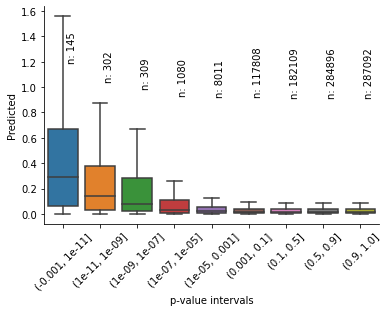

In [28]:
bins = np.array(np.arange(0,5e-9,5e-8).tolist() + [1e-2,0.1,1.0])
bins = [-0.001,1e-11,1e-9, 1e-7, 1e-5,1e-3,1e-1,0.5,0.9,1.0 ]
bqtls['value_group'] = pd.cut(bqtls["pvalue"].astype(np.float64), bins=bins)
bqtls['abs_logfc'] = abs(bqtls['ENCSR000EMT.logfc.mean'])
ax = sns.boxplot(x="value_group", y="abs_logfc", data=bqtls, showfliers=False)
plt.xticks(rotation=45)
medians = bqtls.groupby(['value_group'])['abs_logfc'].median().values
nobs= bqtls['value_group'].value_counts().values[::-1]
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs] 
print(nobs)
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_yticklabels()):
    ax.text(tick+0.1,medians[tick]+0.9,nobs[tick],color='black', verticalalignment = "bottom",rotation=90)
sns.despine()
ax.set(xlabel='p-value intervals', ylabel='Predicted')

plt.savefig("subfigs/bqtls_predicted_bins_dnase.pdf", transparent=True, dpi=300)


/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


['n: 145', 'n: 302', 'n: 309', 'n: 1080', 'n: 8011', 'n: 117808', 'n: 182109', 'n: 284896', 'n: 287092']


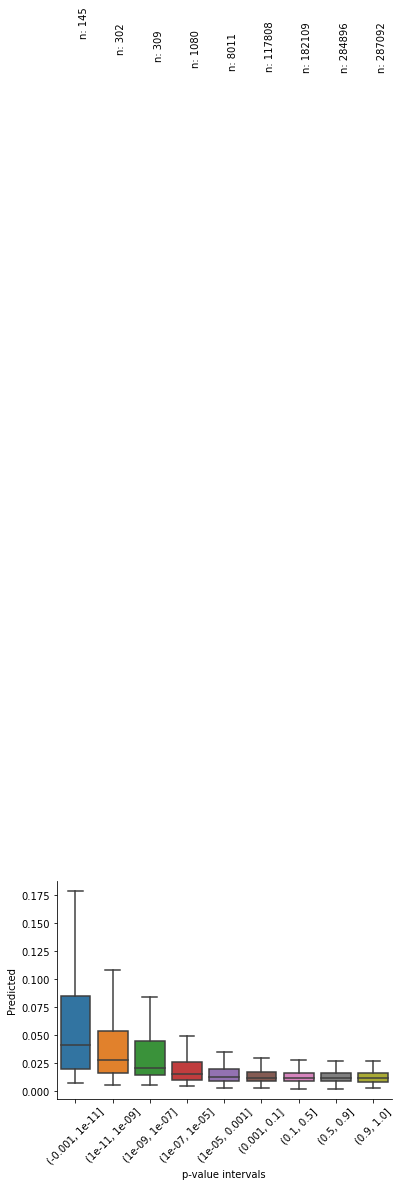

In [29]:
bins = np.array(np.arange(0,5e-9,5e-8).tolist() + [1e-2,0.1,1.0])
bins = [-0.001,1e-11,1e-9, 1e-7, 1e-5,1e-3,1e-1,0.5,0.9,1.0 ]
bqtls['value_group'] = pd.cut(bqtls["pvalue"].astype(np.float64), bins=bins)
bqtls['abs_logfc'] = abs(bqtls['ENCSR000EMT.jsd_sign.mean'])
ax = sns.boxplot(x="value_group", y="abs_logfc", data=bqtls, showfliers=False)
plt.xticks(rotation=45)
medians = bqtls.groupby(['value_group'])['abs_logfc'].median().values
nobs= bqtls['value_group'].value_counts().values[::-1]
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs] 
print(nobs)
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_yticklabels()):
    ax.text(tick+0.1,medians[tick]+0.9,nobs[tick],color='black', verticalalignment = "bottom",rotation=90)
sns.despine()
ax.set(xlabel='p-value intervals', ylabel='Predicted')

plt.savefig("subfigs/bqtls_predicted_bins_dnase_jsd.pdf", transparent=True, dpi=300)


/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


['n: 145', 'n: 302', 'n: 309', 'n: 1080', 'n: 8011', 'n: 117808', 'n: 182109', 'n: 284896', 'n: 287092']


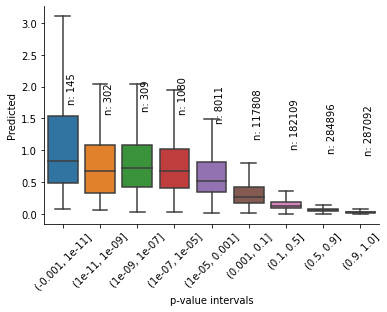

In [30]:

bqtls["abs_logratio"] = abs(bqtls["logratio"])
bins = np.array(np.arange(0,5e-9,5e-8).tolist() + [1e-2,0.1,1.0])
bins = [-0.001,1e-11,1e-9, 1e-7, 1e-5,1e-3,1e-1,0.5,0.9,1.0 ]
bqtls['value_group'] = pd.cut(bqtls["pvalue"].astype(np.float64), bins=bins)
ax = sns.boxplot(x="value_group", y="abs_logratio", data=bqtls, showfliers=False)
plt.xticks(rotation=45)
medians = bqtls.groupby(['value_group'])['abs_logratio'].median().values
nobs= bqtls['value_group'].value_counts().values[::-1]
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs] 
print(nobs)
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_yticklabels()):
    ax.text(tick+0.1,medians[tick]+0.9,nobs[tick],color='black', verticalalignment = "bottom",rotation=90)
sns.despine()
ax.set(xlabel='p-value intervals', ylabel='Predicted')

plt.savefig("subfigs/bqtls_obs_bins.pdf", transparent=True, dpi=300)


In [31]:
sum(bqtls["pvalue"]<1e-9)

447

In [32]:
 bqtls['value_group'].value_counts()

(0.1, 0.5]         287092
(0.5, 0.9]         284896
(0.9, 1.0]         182109
(0.001, 0.1]       117808
(1e-05, 0.001]       8011
(1e-07, 1e-05]       1080
(1e-09, 1e-07]        309
(-0.001, 1e-11]       302
(1e-11, 1e-09]        145
Name: value_group, dtype: int64

In [33]:
bqtls.shape

(881752, 32)

In [34]:
bins = [0,1e-11,1e-9, 1e-7, 1e-5,1e-3,1e-1,0.5,0.9,1.0 ]

pd.cut(bqtls["pvalue"].astype(np.float64), bins=bins)

0         (0.0, 1e-11]
5         (0.0, 1e-11]
6         (0.0, 1e-11]
7         (0.0, 1e-11]
8                  NaN
              ...     
999794      (0.9, 1.0]
999795      (0.9, 1.0]
999796      (0.9, 1.0]
999797      (0.9, 1.0]
999798      (0.9, 1.0]
Name: pvalue, Length: 881752, dtype: category
Categories (9, interval[float64, right]): [(0.0, 1e-11] < (1e-11, 1e-09] < (1e-09, 1e-07] < (1e-07, 1e-05] ... (0.001, 0.1] < (0.1, 0.5] < (0.5, 0.9] < (0.9, 1.0]]

In [35]:
sum(bqtls["pvalue"]<1e-9)

447

In [36]:
bqtls["pvalue"]

0         2.331853e-251
5         1.195059e-111
6         4.004184e-109
7         1.485270e-108
8          0.000000e+00
              ...      
999794     1.000000e+00
999795     1.000000e+00
999796     1.000000e+00
999797     1.000000e+00
999798     1.000000e+00
Name: pvalue, Length: 881752, dtype: float64